In [7]:
from math import factorial
import numpy as np
from itertools import combinations_with_replacement
import time
from grad_descent import grad_descent
from function_generation.PolynomialGenerator import PolynomialGenerator
from experiments.utils.generate_quadratics import generate_quadratic
from experiments.utils.get_lipschitz import get_lipschitz
from line_searches.Constant import Constant
from line_searches.QuasiWolfe import QuasiWolfe

import matplotlib.pyplot as plt
from experiments.utils.miscellaneous import smooth_running_mean

In [8]:


max_steps = 100000
single_epsilon = 1e-4
# epsilons = [1e-6]
bounds = [-1, 1]

stopping_conditions = ["grad", "x", "y"]

dim = 200
degree = 2

stopping_condition = stopping_conditions[0]
# l1 = np.max(np.abs(np.linalg.eigvals(h())))



# f,g,h = PolynomialGenerator().generate(dim, degree, all_positive=False)

# now a single run


# const = Constant(1/l1)
# 0,       1           2               3          4          5            6          7
# steps, step_count, f_calls_count, g_calls_count, end, gradients, objective_values, success

# start = x0


# print(res[1])
# print(f" f calls {res[2]}")
# print(f" g calls {res[3]}")


In [9]:
repeats = 20
number_to_check = 18

x0s = np.linspace(0.01,5,number_to_check)

results = np.zeros((repeats, number_to_check, 2))

for i in range(repeats):
    for j, alpha_init in enumerate(x0s):
        x0 = np.random.uniform(-1, 1, dim)
        f, g, h, = generate_quadratic(dim)
        qw = QuasiWolfe(alpha0=alpha_init)
        res = grad_descent(f, g, x0, epsilon=single_epsilon, record_trace=False, record_gradients=False,
                       record_objective_values=False, learning_rate=qw, constraints=bounds,
                       termination_criterion=stopping_condition, max_steps=max_steps, nesterov=False, verbose=False)

        results[i,j,0] = res[2]
        results[i,j,1] = res[3]
    print(f" {i} done")


interpolate failed math domain error
interpolate failed math domain error
 0 done
 1 done
 2 done
 3 done
 4 done
interpolate failed math domain error
 5 done
 6 done
 7 done
interpolate failed math domain error
interpolate failed math domain error
 8 done
 9 done
interpolate failed math domain error
 10 done
interpolate failed math domain error
 11 done
 12 done
 13 done
interpolate failed math domain error
 14 done
 15 done
 16 done
 17 done
 18 done
 19 done


Text(0.5, 0, 'Initial step size')

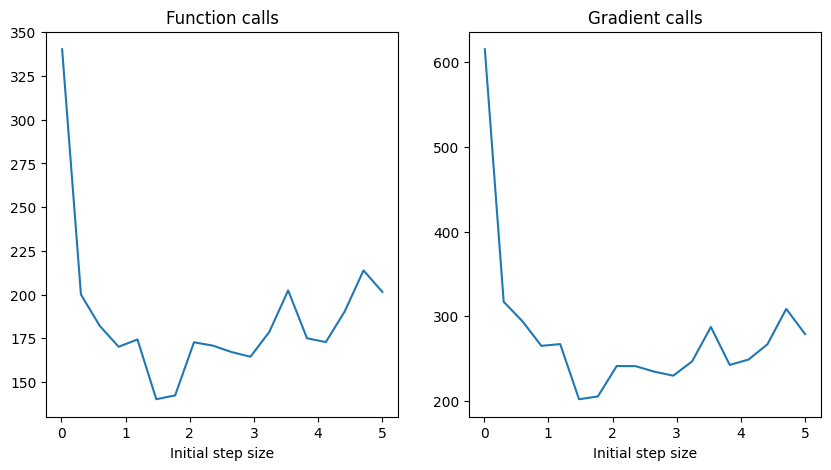

In [17]:
means_f = np.mean(results[:,:,0], axis=0)

means_g = np.mean(results[:,:,1], axis=0)

fig, ax = plt.subplots(1, figsize=(10, 5))

ax[0].plot(x0s, means_f)
ax[1].plot(x0s, means_g)
plt.style.use('default')
plt.grid(False)
ax[0].set_title("Function calls")
ax[1].set_title("Gradient calls")
ax[0].set_xlabel("Initial step size")
ax[1].set_xlabel("Initial step size")
